In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## **Importing data**

In [30]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\demand_sales_data.csv")
df.head()

,date,Order_ID,Company,Company_Region,Product_ID,Product,Customer_ID,Product Category01,Product Category02,Product Category03,Quantity,unit,price_per_case
0,1/1/2021,6141309,121,South,11829,AVO32CNV2,DMKUT,32.0,CNV,#2,224,case,41
1,1/1/2021,6377268,131,North,11541,AVO60CNV1,QPDXK,60.0,CNV,1,396,case,46
2,1/1/2021,6377268,131,North,11931,AVO48CNV1,QPDXK,NaN,CNV,1,148,case,45
3,1/1/2021,6191867,121,South,11829,AVO32CNV2,IEHDJ,32.0,CNV,#2,150,case,41
4,1/1/2021,6191867,121,South,11385,AVO48CNV2,IEHDJ,48.0,CNV,#2,294,case,49


---

## **Data shape**

In [31]:
print(df.shape)
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features\nThis means the Date set has in total",df.size,"elemensts or cells")

(11386, 13)
The data set has 11386 rows, and 13 features
This means the Date set has in total 148018 elemensts or cells


---

## **Data types**

In [32]:
df.dtypes

date                   object
Order_ID                int64
Company                 int64
Company_Region         object
Product_ID              int64
Product                object
Customer_ID            object
Product Category01    float64
Product Category02     object
Product Category03     object
Quantity                int64
unit                   object
price_per_case          int64
dtype: object

---

## **Data info**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11386 entries, 0 to 11385
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                11386 non-null  object 
 1   Order_ID            11386 non-null  int64  
 2   Company             11386 non-null  int64  
 3   Company_Region      11386 non-null  object 
 4   Product_ID          11386 non-null  int64  
 5   Product             11240 non-null  object 
 6   Customer_ID         11386 non-null  object 
 7   Product Category01  11148 non-null  float64
 8   Product Category02  11138 non-null  object 
 9   Product Category03  11264 non-null  object 
 10  Quantity            11386 non-null  int64  
 11  unit                11386 non-null  object 
 12  price_per_case      11386 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


---

>  --->*obviously we need to to do some cleaning*

---

### *A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [34]:
df.columns

Index(['date', 'Order_ID', 'Company', 'Company_Region', 'Product_ID',
       'Product', 'Customer_ID', 'Product Category01', 'Product Category02',
       'Product Category03', 'Quantity', 'unit', 'price_per_case'],
      dtype='object')

In [35]:
import janitor
df=df.clean_names()

In [36]:
df.columns

Index(['date', 'order_id', 'company', 'company_region', 'product_id',
       'product', 'customer_id', 'product_category01', 'product_category02',
       'product_category03', 'quantity', 'unit', 'price_per_case'],
      dtype='object')

---
---

### *Duplicated data  :*

In [37]:
df.duplicated().sum()

48

In [38]:
df.drop_duplicates(inplace=True)

---
---

### *B. na-values :*

#### Missing data : 
- Missing completly at random (MCR) : the data not mentioned at all and not dependens on any other features at all like   (forgotten to mention)
- Missing at random (MR): the missed data are based on other featurs in the dataset
- Missing not at random (MNR): the missed data are missed by intention like not mentioning name ,age,weight,etc..

---

#### The number of missing data :

In [39]:
print("The total number of na_values are :",df.isna().sum().sum())
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na_values are : 753

The number of na-values in each features are :


date                    0
order_id                0
company                 0
company_region          0
product_id              0
product               146
customer_id             0
product_category01    237
product_category02    248
product_category03    122
quantity                0
unit                    0
price_per_case          0
dtype: int64

---

#### *B.1 Important observations :*

- The product feature names constructed of parts from another features :  
example: <br> 1. The 1st three charachters : are common between all products names<br>2. The 2nd two charachters : are numbers exctacted for the product category01<br>3. The 3rd three charachters : are exctacted for the product category02 <br>4. The 4th last charachters : are numbers exctacted for the product category03
- some products are unknown , will fill the unkown products based on the product_id column as it contains unique id's( Missing at random (MR))


---

##### *B.1.1: Filling the unkown products based on the product_id column as it contains unique id's :*

In [40]:
print("The products names as per he product ID are as below: ")
df.groupby("product_id")["product"].unique()

The products names as per he product ID are as below: 


product_id
11133    [AVO60CNV2, nan]
11177         [AVO32ORG0]
11385         [AVO48CNV2]
11501         [AVO32CNV1]
11541         [AVO60CNV1]
11829    [AVO32CNV2, nan]
11931    [AVO48CNV1, nan]
Name: product, dtype: object

In [41]:
# To fill the names will use the below function

df.loc[df.product_id == 11133, 'product'] = "AVO60CNV2"
df.loc[df.product_id == 11829, 'product'] = "AVO32CNV2"
df.loc[df.product_id == 11931, 'product'] = "AVO48CNV1"

In [42]:
# recheck id product fetaure still has na values or not:
df.isna().sum()

date                    0
order_id                0
company                 0
company_region          0
product_id              0
product                 0
customer_id             0
product_category01    237
product_category02    248
product_category03    122
quantity                0
unit                    0
price_per_case          0
dtype: int64

---

##### *B.1.2: Filling na values /replacing or correcting the existing values in the features : [product_category01,product_category02,product_category03]  , based on the product name components :*

In [43]:
# To do so will use the below function:

df["product_category01"]=df["product"].str.slice(3,5)
df["product_category02"]=df["product"].str.slice(5,8)
df["product_category03"]=df["product"].str.slice(-1)

In [44]:
# recheck if the features : [product_category01,product_category02,product_category03] still has na values or not:
df.isna().sum()

date                  0
order_id              0
company               0
company_region        0
product_id            0
product               0
customer_id           0
product_category01    0
product_category02    0
product_category03    0
quantity              0
unit                  0
price_per_case        0
dtype: int64

In [45]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case
0,1/1/2021,6141309,121,South,11829,AVO32CNV2,DMKUT,32,CNV,2,224,case,41
1,1/1/2021,6377268,131,North,11541,AVO60CNV1,QPDXK,60,CNV,1,396,case,46
2,1/1/2021,6377268,131,North,11931,AVO48CNV1,QPDXK,48,CNV,1,148,case,45
3,1/1/2021,6191867,121,South,11829,AVO32CNV2,IEHDJ,32,CNV,2,150,case,41
4,1/1/2021,6191867,121,South,11385,AVO48CNV2,IEHDJ,48,CNV,2,294,case,49


---
---

### *C. Data Types check :*

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11338 entries, 0 to 11385
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                11338 non-null  object
 1   order_id            11338 non-null  int64 
 2   company             11338 non-null  int64 
 3   company_region      11338 non-null  object
 4   product_id          11338 non-null  int64 
 5   product             11338 non-null  object
 6   customer_id         11338 non-null  object
 7   product_category01  11338 non-null  object
 8   product_category02  11338 non-null  object
 9   product_category03  11338 non-null  object
 10  quantity            11338 non-null  int64 
 11  unit                11338 non-null  object
 12  price_per_case      11338 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


---

#### *C.1 Important observations :*

- The date feature to be converted to datetime type.
- The order_id feature to be converted to object Date type as it's unique. 
- The product_id to be converted to object Date type as it's unique.
- The product_category0 & product_category02 & product_category03 ; perfect as they are categories and not numbers

##### *C.1.1 converting the order_id to object Data Type:*

In [47]:
df["order_id"]=df["order_id"].astype("str")

##### *C.1.2 converting the product_id to object Data Type:*

In [48]:
df["product_id"]=df["product_id"].astype("str")

##### *C.1.3 converting the date feature to date Data Type:*

In [49]:

df["date"]=pd.to_datetime(df["date"])

---

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11338 entries, 0 to 11385
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                11338 non-null  datetime64[ns]
 1   order_id            11338 non-null  object        
 2   company             11338 non-null  int64         
 3   company_region      11338 non-null  object        
 4   product_id          11338 non-null  object        
 5   product             11338 non-null  object        
 6   customer_id         11338 non-null  object        
 7   product_category01  11338 non-null  object        
 8   product_category02  11338 non-null  object        
 9   product_category03  11338 non-null  object        
 10  quantity            11338 non-null  int64         
 11  unit                11338 non-null  object        
 12  price_per_case      11338 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory us

In [51]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case
0,2021-01-01,6141309,121,South,11829,AVO32CNV2,DMKUT,32,CNV,2,224,case,41
1,2021-01-01,6377268,131,North,11541,AVO60CNV1,QPDXK,60,CNV,1,396,case,46
2,2021-01-01,6377268,131,North,11931,AVO48CNV1,QPDXK,48,CNV,1,148,case,45
3,2021-01-01,6191867,121,South,11829,AVO32CNV2,IEHDJ,32,CNV,2,150,case,41
4,2021-01-01,6191867,121,South,11385,AVO48CNV2,IEHDJ,48,CNV,2,294,case,49


---
---

### *D. Creating new features :*

---

#### *D.1 creating total sales feature:*

In [52]:

df["total_sales"]=df["price_per_case"]*df["quantity"]

In [53]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case,total_sales
0,2021-01-01,6141309,121,South,11829,AVO32CNV2,DMKUT,32,CNV,2,224,case,41,9184
1,2021-01-01,6377268,131,North,11541,AVO60CNV1,QPDXK,60,CNV,1,396,case,46,18216
2,2021-01-01,6377268,131,North,11931,AVO48CNV1,QPDXK,48,CNV,1,148,case,45,6660
3,2021-01-01,6191867,121,South,11829,AVO32CNV2,IEHDJ,32,CNV,2,150,case,41,6150
4,2021-01-01,6191867,121,South,11385,AVO48CNV2,IEHDJ,48,CNV,2,294,case,49,14406


---

#### *D.2 creating year,month,day features:*

In [54]:
from datetime import datetime
df["year"]=df["date"].dt.year           # creating year feature
df["year"]=df["year"].astype("str")
df["month"]=df["date"].dt.month         # creating month feature
df["month_name"]=df["date"].dt.month_name()
df["day"]=df["date"].dt.day             # creating day feature
df["day_name"]=df["date"].dt.day_name()

In [55]:
df.head()

,date,order_id,company,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,quantity,unit,price_per_case,total_sales,year,month,month_name,day,day_name
0,2021-01-01,6141309,121,South,11829,AVO32CNV2,DMKUT,32,CNV,2,224,case,41,9184,2021,1,January,1,Friday
1,2021-01-01,6377268,131,North,11541,AVO60CNV1,QPDXK,60,CNV,1,396,case,46,18216,2021,1,January,1,Friday
2,2021-01-01,6377268,131,North,11931,AVO48CNV1,QPDXK,48,CNV,1,148,case,45,6660,2021,1,January,1,Friday
3,2021-01-01,6191867,121,South,11829,AVO32CNV2,IEHDJ,32,CNV,2,150,case,41,6150,2021,1,January,1,Friday
4,2021-01-01,6191867,121,South,11385,AVO48CNV2,IEHDJ,48,CNV,2,294,case,49,14406,2021,1,January,1,Friday


---
---

### *E. data describtion*

---

#### *E1. categorical features*

In [56]:
df.describe(include="object")

,order_id,company_region,product_id,product,customer_id,product_category01,product_category02,product_category03,unit,year,month_name,day_name
count,11338,11338,11338,11338,11338,11338,11338,11338,11338,11338,11338,11338
unique,4558,2,7,7,298,3,2,3,2,3,12,7
top,6171927,South,11829,AVO32CNV2,QPDXK,32,CNV,2,case,2022,May,Sunday
freq,6,7340,3687,3687,2887,4546,11181,5817,11092,4757,1163,2976


---

#### *E2. numeric features*

In [57]:
pd.DataFrame(df.select_dtypes(exclude="object")[["quantity","price_per_case","total_sales"]]).describe()

,quantity,price_per_case,total_sales
count,11338.000000,11338.000000,11338.000000
mean,313.280737,42.528841,13305.313018
std,509.306463,4.656775,21637.964702
min,10.000000,35.000000,360.000000
25%,114.000000,38.000000,4802.000000
50%,227.000000,42.000000,9586.500000
75%,344.000000,47.000000,14800.000000
max,10407.000000,50.000000,364245.000000


---

#### *E3. numeric features Distribution on plots*

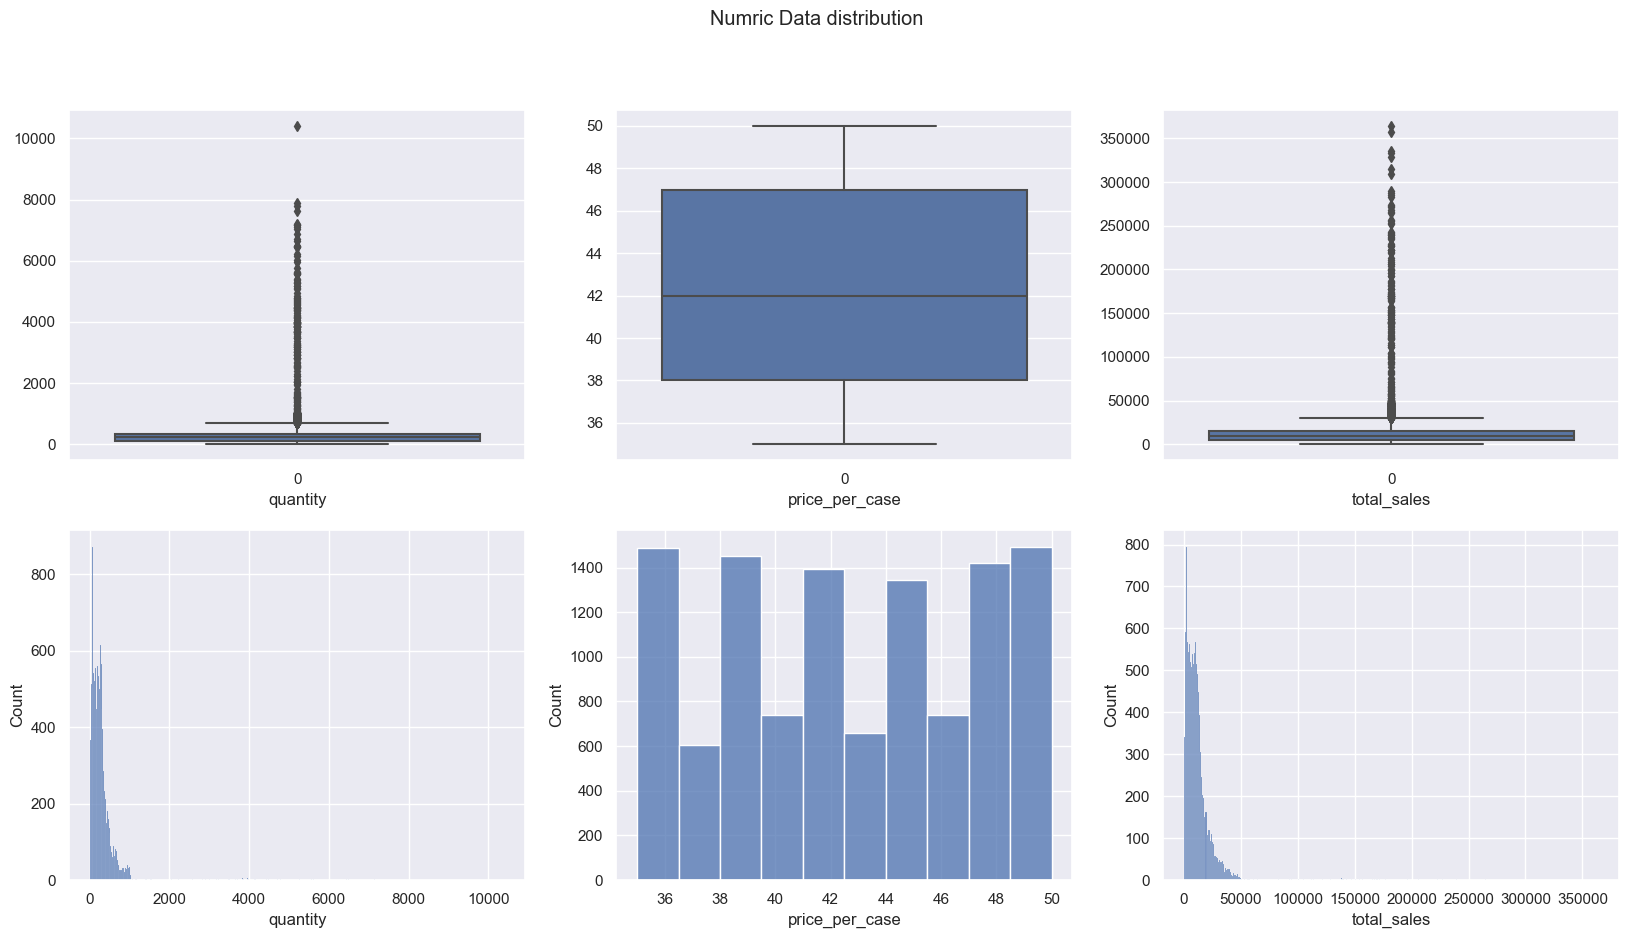

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(231)
sns.boxplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(232)
sns.boxplot(df["price_per_case"])
plt.xlabel("price_per_case");

plt.subplot(233)
sns.boxplot(df["total_sales"])
plt.xlabel("total_sales");


plt.subplot(234)
sns.histplot(df["quantity"])
plt.xlabel("quantity");

plt.subplot(235)
sns.histplot(df["price_per_case"],bins=10)
plt.xlabel("price_per_case");

plt.subplot(236)
sns.histplot(df["total_sales"])
plt.xlabel("total_sales");

Inferentail statistics

In [59]:
df_stat=df.copy()

In [60]:
df_stat.columns

Index(['date', 'order_id', 'company', 'company_region', 'product_id',
       'product', 'customer_id', 'product_category01', 'product_category02',
       'product_category03', 'quantity', 'unit', 'price_per_case',
       'total_sales', 'year', 'month', 'month_name', 'day', 'day_name'],
      dtype='object')

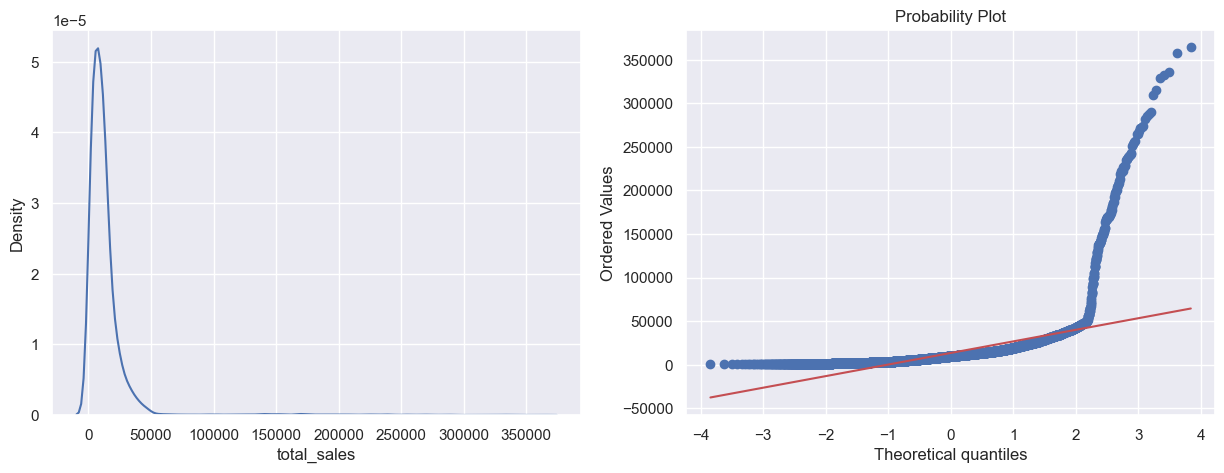

In [65]:
import scipy.stats as stats
import pylab
def normality(data):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

normality(data=df_stat["total_sales"])

In [62]:
from scipy.stats import shapiro
def shapiro_test(data, alpha = 0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print(f'Data looks Gaussian the p value is {p}')
    else:
        print(f'Data look does not look Gaussian the p value is {p}')

shapiro_test(data=df_stat["total_sales"])

Data look does not look Gaussian the p value is 0.0


In [73]:
def convert_to_normality(feature,method):
    if method=="log":normality(np.log(df_stat[feature]))
    elif method=="reciprocal":normality( 1/df_stat[feature])
    elif method=="sqroot":normality(np.sqrt(df_stat[feature]))
    elif method=="exponential": normality(df_stat[feature]**(1/1.2))

df_stat['total_sales_Boxcox'],parameters=stats.boxcox(df_stat['total_sales'])    

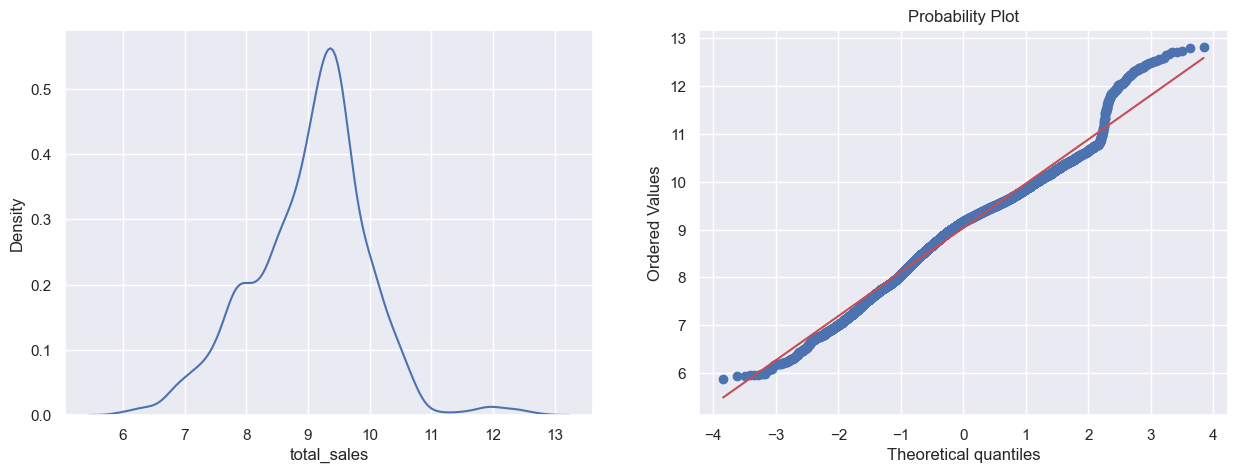

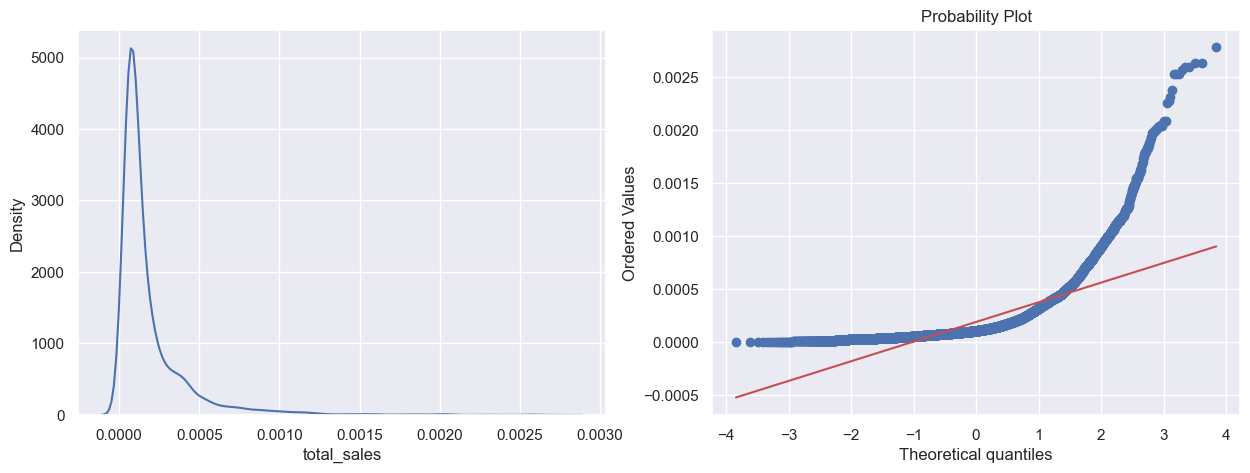

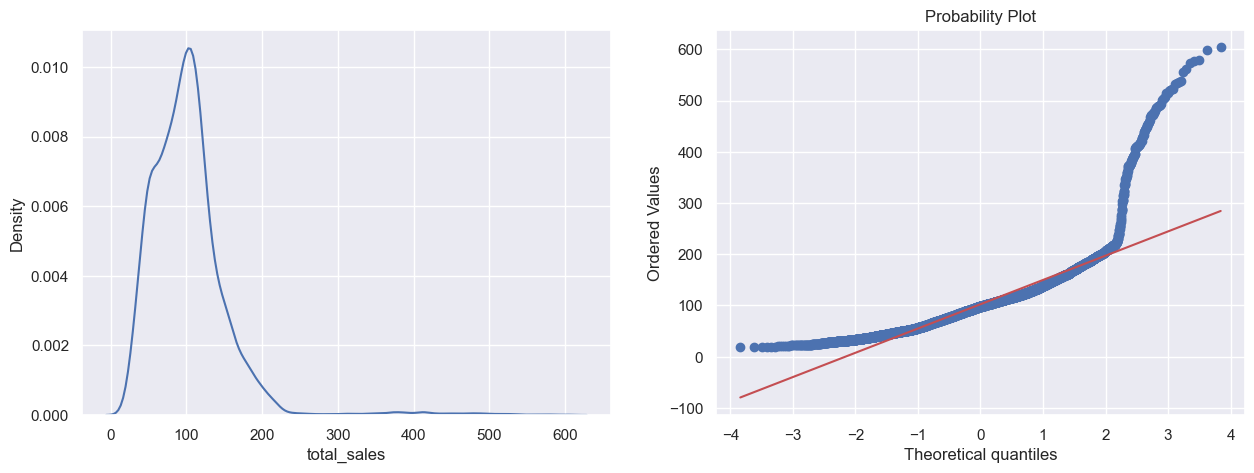

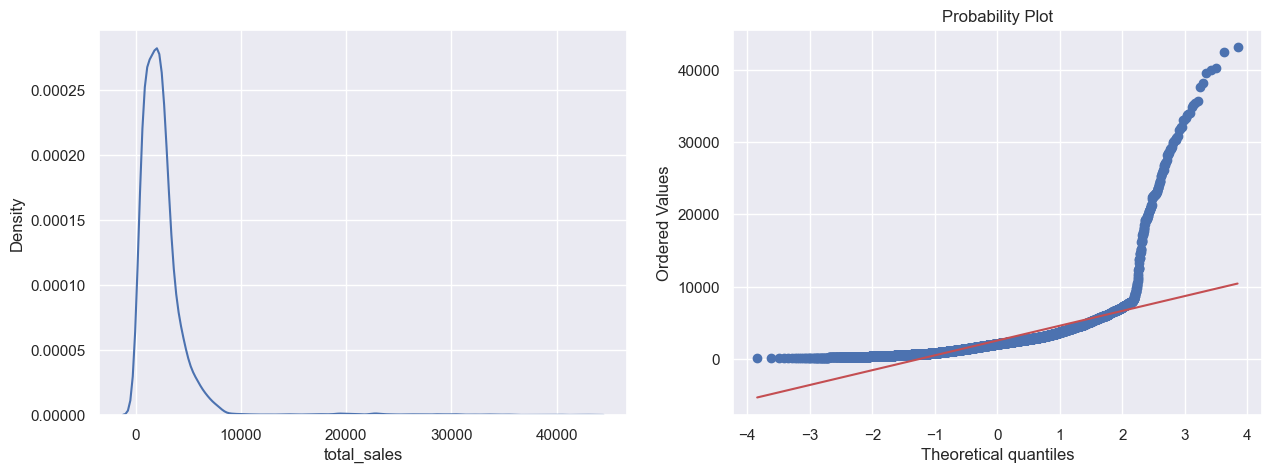

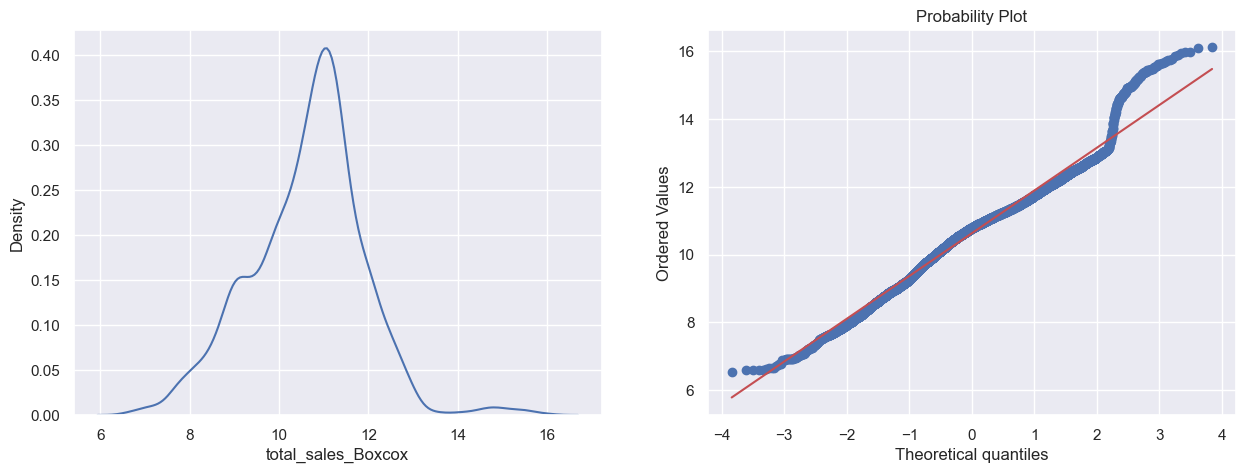

In [82]:
convert_to_normality(feature="total_sales",method="log")
convert_to_normality(feature="total_sales",method="reciprocal")
convert_to_normality(feature="total_sales",method="sqroot")
convert_to_normality(feature="total_sales",method="exponential")
normality(df_stat["total_sales_Boxcox"])

* *From all the transformations discussed above, we can conclude that the Box cox perform the best on the Price variable and transform it to normal distribution*

* *total_sales_Boxcox ~ company*

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Anova_1way=ols("total_sales_Boxcox~company",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq     mean_sq           F        PR(>F)
company       1.0    215.290963  215.290963  134.687609  5.781046e-31
Residual  11336.0  18119.991685    1.598447         NaN           NaN


In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["company"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
121,131,-0.2756,0.0,-0.3222,-0.2291,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between companies*

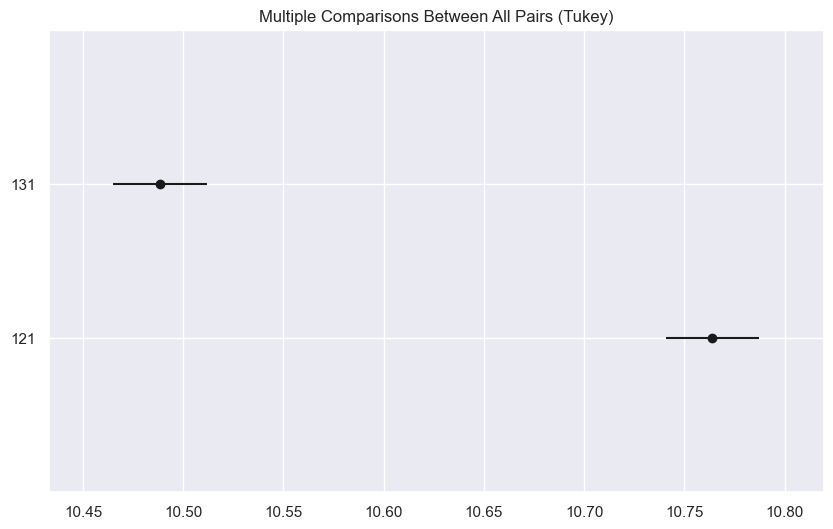

In [104]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ company_region*

In [107]:
Anova_1way=ols("total_sales_Boxcox~company_region",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                     df        sum_sq     mean_sq           F        PR(>F)
company_region      1.0    284.618664  284.618664  178.743407  1.845024e-40
Residual        11336.0  18050.663984    1.592331         NaN           NaN


In [108]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["company_region"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
North,South,-0.3316,0.0,-0.3802,-0.283,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between Regions*

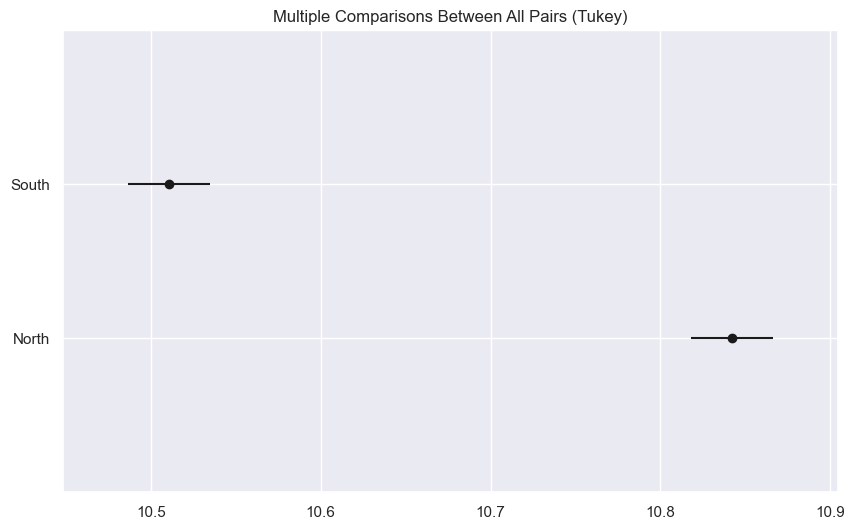

In [109]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_id*

In [113]:
Anova_1way=ols("total_sales_Boxcox~product",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq     mean_sq           F  PR(>F)
product       6.0   3889.579779  648.263296  508.488336     0.0
Residual  11331.0  14445.702870    1.274883         NaN     NaN


In [114]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AVO32CNV1,AVO32CNV2,-0.8223,0.0,-0.9594,-0.6852,True
AVO32CNV1,AVO32ORG0,-0.3376,0.0126,-0.6315,-0.0436,True
AVO32CNV1,AVO48CNV1,0.6647,0.0,0.5236,0.8058,True
AVO32CNV1,AVO48CNV2,-0.3736,0.0,-0.529,-0.2181,True
AVO32CNV1,AVO60CNV1,0.2768,0.0,0.1304,0.4231,True
AVO32CNV1,AVO60CNV2,-0.0943,0.6701,-0.2662,0.0775,False
AVO32CNV2,AVO32ORG0,0.4847,0.0,0.2134,0.756,True
AVO32CNV2,AVO48CNV1,1.487,0.0,1.4026,1.5714,True
AVO32CNV2,AVO48CNV2,0.4487,0.0,0.342,0.5554,True
AVO32CNV2,AVO60CNV1,1.0991,0.0,1.0061,1.192,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between products except between :<br>(AVO32ORG0,AVO60CNV)<br>(AVO32ORG0,AVO48CNV2)<br>(AVO32CNV1,AVO60CNV2)*




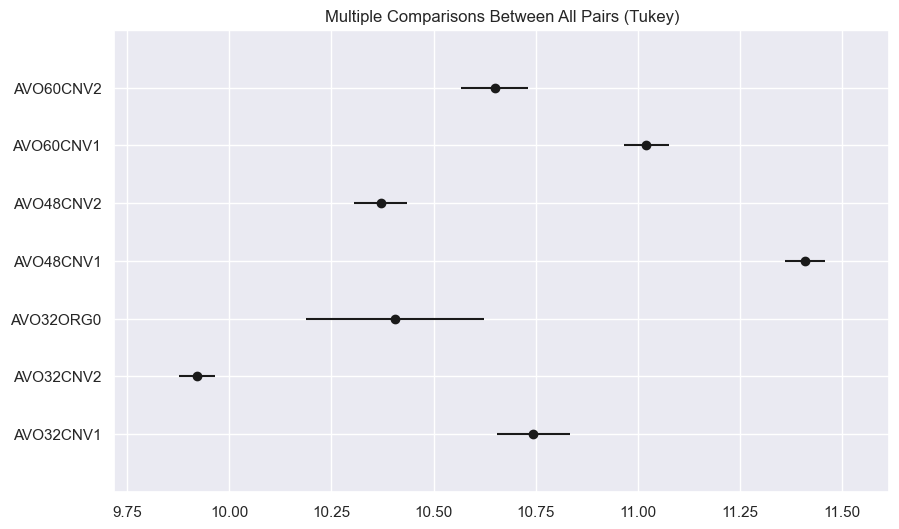

In [115]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_id*

In [117]:
Anova_1way=ols("total_sales_Boxcox~product_category01",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq      mean_sq           F  PR(>F)
product_category01      2.0   2436.736243  1218.368122  868.645617     0.0
Residual            11335.0  15898.546405     1.402607         NaN     NaN


In [118]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category01"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
32,48,1.0012,0.0,0.9411,1.0613,True
32,60,0.8474,0.0,0.7806,0.9143,True
48,60,-0.1538,0.0,-0.2223,-0.0852,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category01*

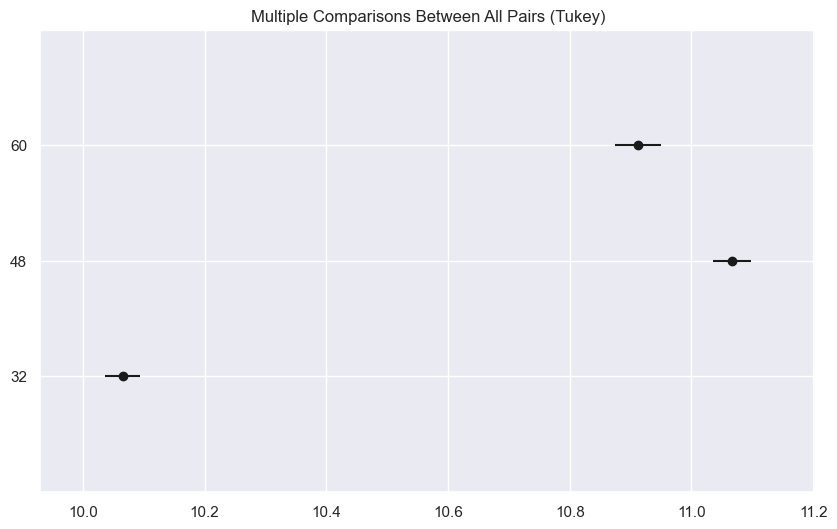

In [119]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_category02*

In [121]:
Anova_1way=ols("total_sales_Boxcox~product_category02",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq   mean_sq         F    PR(>F)
product_category02      1.0      7.786883  7.786883  4.816375  0.028211
Residual            11336.0  18327.495766  1.616752       NaN       NaN


In [122]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category02"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CNV,ORG,-0.2243,0.0282,-0.4246,-0.024,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category02*

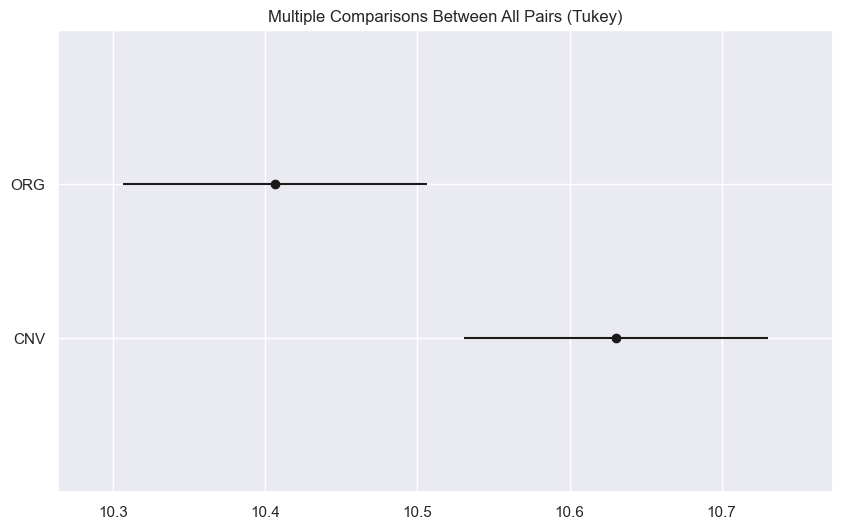

In [123]:
tukey.plot_simultaneous();

* *total_sales_Boxcox ~ product_category03*

In [126]:
Anova_1way=ols("total_sales_Boxcox~product_category03",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                         df        sum_sq      mean_sq            F  PR(>F)
product_category03      2.0   3111.195440  1555.597720  1158.210664     0.0
Residual            11335.0  15224.087208     1.343104          NaN     NaN


In [127]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["product_category03"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.7729,0.0,0.5529,0.9929,True
0,2,-0.2816,0.0075,-0.5014,-0.0619,True
1,2,-1.0545,0.0,-1.106,-1.0031,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between all product_category03*

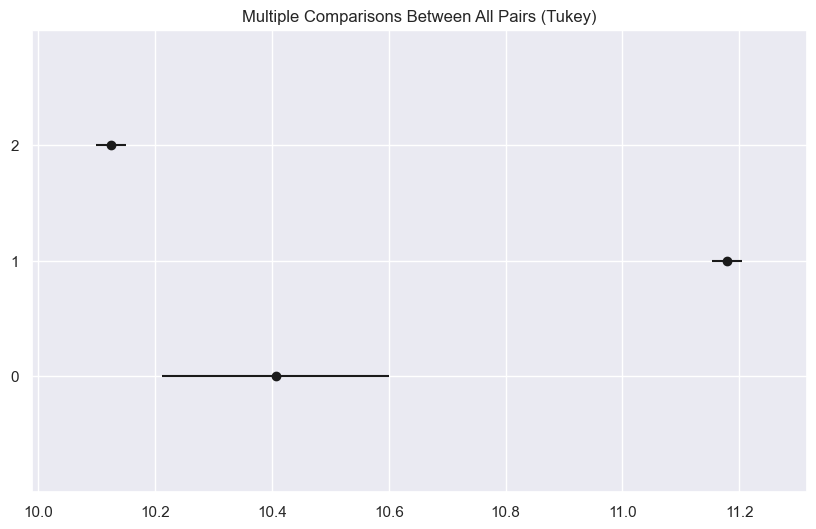

In [128]:
tukey.plot_simultaneous();

In [135]:
Anova_1way=ols("total_sales_Boxcox~unit",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

               df        sum_sq      mean_sq            F  PR(>F)
unit          1.0   2484.966157  2484.966157  1777.224851     0.0
Residual  11336.0  15850.316491     1.398228          NaN     NaN


In [136]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["unit"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
case,kg,3.2133,0.0,3.0639,3.3627,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between units*

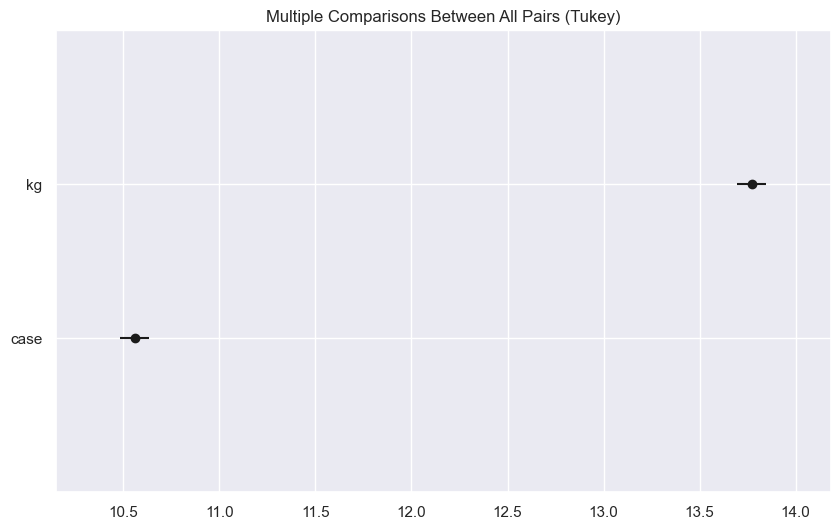

In [137]:
tukey.plot_simultaneous();

In [138]:
Anova_1way=ols("total_sales_Boxcox~month_name",data=df_stat).fit()
Anova_results=sm.stats.anova_lm(Anova_1way,type=2)
print(Anova_results)

                 df        sum_sq   mean_sq         F        PR(>F)
month_name     11.0     82.575943  7.506904  4.658114  3.894125e-07
Residual    11326.0  18252.706705  1.611576       NaN           NaN


In [139]:
tukey=pairwise_tukeyhsd(endog=df_stat["total_sales_Boxcox"],groups=df["month_name"],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
April,August,0.2689,0.0001,0.084,0.4537,True
April,December,0.1992,0.0663,-0.0059,0.4043,False
April,February,0.1588,0.1681,-0.0247,0.3422,False
April,January,0.0999,0.7932,-0.0771,0.2768,False
April,July,0.1988,0.0155,0.0193,0.3783,True
April,June,0.1988,0.017,0.018,0.3796,True
April,March,0.0712,0.9756,-0.104,0.2464,False
April,May,0.1193,0.5257,-0.0554,0.2941,False
April,November,0.1588,0.2844,-0.0415,0.3591,False
April,October,0.3092,0.0,0.1149,0.5035,True


> *Tuckey HSD test clearly says that there’s a significant difference in the mean between below months<br>
(April,August)<br>
(April,July)<br>
(April,June)<br>
(April,October)<br>
(April,September)<br>
(August,March)<br>
(January,October)<br>*









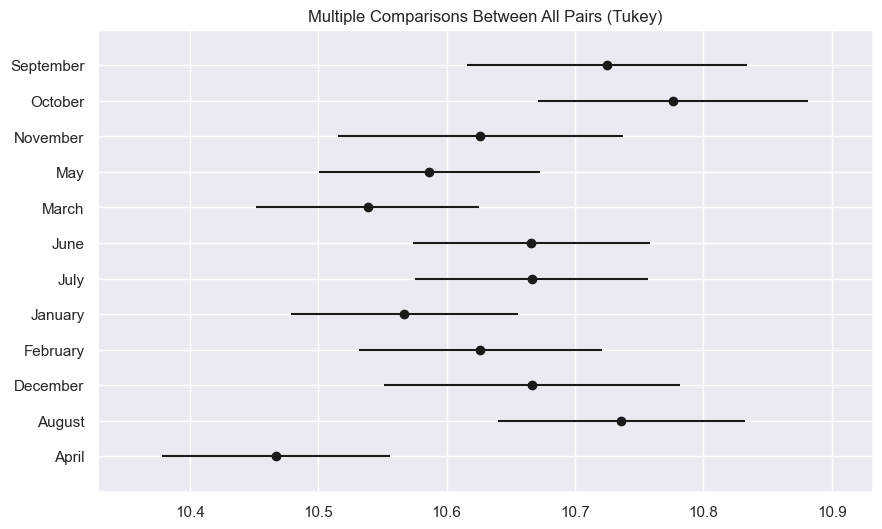

In [140]:
tukey.plot_simultaneous();

---
---

### *F. Analysis*

> *The main goal is to predict to total sales based on the input x variables* 

---

#### *steps*

- As the moduls can't deal with any data outside numeric space ; we will convert all strings to numeric by creating dummies variables 
- Will concatinate the dummies features with the dataset and drop the existed string features
- Will Define x and y features  (y is the targeted feature which is the total sales , and x are the input features)
- Will look at the coorelatione between the x features and drop any features with coorelation more than 0.5
- Will Scale the data so we can balance the impact of all features and can help to improve the performance of the algorithm
- Then will split the data into training and testing sets to compare the seen data(trained) with the unseen (tested)
- Apply differnt types of algorithms
- Finally will compare the differnt outcomes to find the best one

---

#### *F1. create dummies varibales :*

In [260]:
dummies=pd.get_dummies(df.select_dtypes(include="object"))

In [261]:
dummies.head()

,order_id_6100387,order_id_6100630,order_id_6100744,order_id_6100823,order_id_6100869,order_id_6100954,order_id_6101057,order_id_6101211,order_id_6101821,order_id_6101940,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [262]:
dummies=dummies.applymap(lambda x:1 if x is True else 0)
dummies.head()

,order_id_6100387,order_id_6100630,order_id_6100744,order_id_6100823,order_id_6100869,order_id_6100954,order_id_6101057,order_id_6101211,order_id_6101821,order_id_6101940,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


> ### Important Notes: 
> - we got 4904 columns ,this is due to high number of unique values for (order_id) and (customer_id) features
> - so to reduce the complexity and machine consumption , will drop these features

In [263]:
dummies_new=pd.get_dummies(df.select_dtypes(include="object").drop(["order_id","customer_id"],axis=1))

In [264]:
df1=df.select_dtypes(exclude="object").drop(["date","month","day","price_per_case","quantity"],axis=1)
dummies_new=dummies_new.applymap(lambda x:1 if x is True else 0)
dummies_new.head()

,company_region_North,company_region_South,product_id_11133,product_id_11177,product_id_11385,product_id_11501,product_id_11541,product_id_11829,product_id_11931,product_AVO32CNV1,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


---

#### *F2. Concatinate the dummies features with the dataset and drop the existed string features :*

In [265]:
df2=pd.concat([df1,dummies_new],axis=1)

In [266]:
df2.head()

,company,total_sales,company_region_North,company_region_South,product_id_11133,product_id_11177,product_id_11385,product_id_11501,product_id_11541,product_id_11829,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,121,9184,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,131,18216,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,131,6660,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,121,6150,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,121,14406,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


---

#### *F3. Looking at the coorelatione between the features and drop any features with coorelation below 0.5 :*

##### *F3.1. Looking at the coorelatione between the features :*

In [267]:
df2.corr()

,company,total_sales,company_region_North,company_region_South,product_id_11133,product_id_11177,product_id_11385,product_id_11501,product_id_11541,product_id_11829,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
company,1.000000,0.056418,0.745093,-0.745093,-0.274198,-0.117374,-0.178687,0.259368,0.339418,-0.150608,...,-0.034777,-0.048922,-0.049645,-0.027372,-0.032946,0.059217,0.062616,-0.025965,-0.021305,-0.022072
total_sales,0.056418,1.000000,0.144967,-0.144967,-0.053882,-0.029159,-0.081754,0.031987,0.116098,-0.193391,...,-0.019499,0.020514,-0.000549,0.002265,0.010718,-0.012118,-0.063093,0.010492,0.053939,0.011519
company_region_North,0.745093,0.144967,1.000000,-1.000000,-0.204303,-0.087455,-0.237768,0.061630,0.290282,-0.102106,...,-0.007601,-0.015843,-0.014344,-0.001264,0.027794,0.065720,-0.121419,-0.001836,0.037088,0.037665
company_region_South,-0.745093,-0.144967,-1.000000,1.000000,0.204303,0.087455,0.237768,-0.061630,-0.290282,0.102106,...,0.007601,0.015843,0.014344,0.001264,-0.027794,-0.065720,0.121419,0.001836,-0.037088,-0.037665
product_id_11133,-0.274198,-0.053882,-0.204303,0.204303,1.000000,-0.032803,-0.100614,-0.071118,-0.126905,-0.192167,...,0.015259,0.009936,0.011345,-0.034811,0.012871,-0.015384,0.021189,-0.035735,0.016386,0.016604
product_id_11177,-0.117374,-0.029159,-0.087455,0.087455,-0.032803,1.000000,-0.043069,-0.030443,-0.054323,-0.082260,...,-0.002424,0.003489,0.002786,-0.040387,-0.050368,-0.034816,0.198631,-0.040330,-0.049526,-0.049474
product_id_11385,-0.178687,-0.081754,-0.237768,0.237768,-0.100614,-0.043069,1.000000,-0.093376,-0.166621,-0.252309,...,-0.009529,0.006234,-0.002313,-0.057301,0.006523,-0.032641,0.140950,-0.057050,-0.029136,-0.028887
product_id_11501,0.259368,0.031987,0.061630,-0.061630,-0.071118,-0.030443,-0.093376,1.000000,-0.117776,-0.178343,...,-0.013195,-0.017934,-0.019600,-0.063592,-0.002464,-0.048422,0.119559,-0.063441,0.000628,-0.000210
product_id_11541,0.339418,0.116098,0.290282,-0.290282,-0.126905,-0.054323,-0.166621,-0.117776,1.000000,-0.318239,...,-0.012147,-0.009009,-0.010063,0.009208,-0.000198,0.052105,-0.054411,0.009616,0.006022,0.005713
product_id_11829,-0.150608,-0.193391,-0.102106,0.102106,-0.192167,-0.082260,-0.252309,-0.178343,-0.318239,1.000000,...,0.011233,0.004236,0.008395,0.066762,0.005646,0.005572,-0.124426,0.066822,0.014674,0.014672


<Axes: >

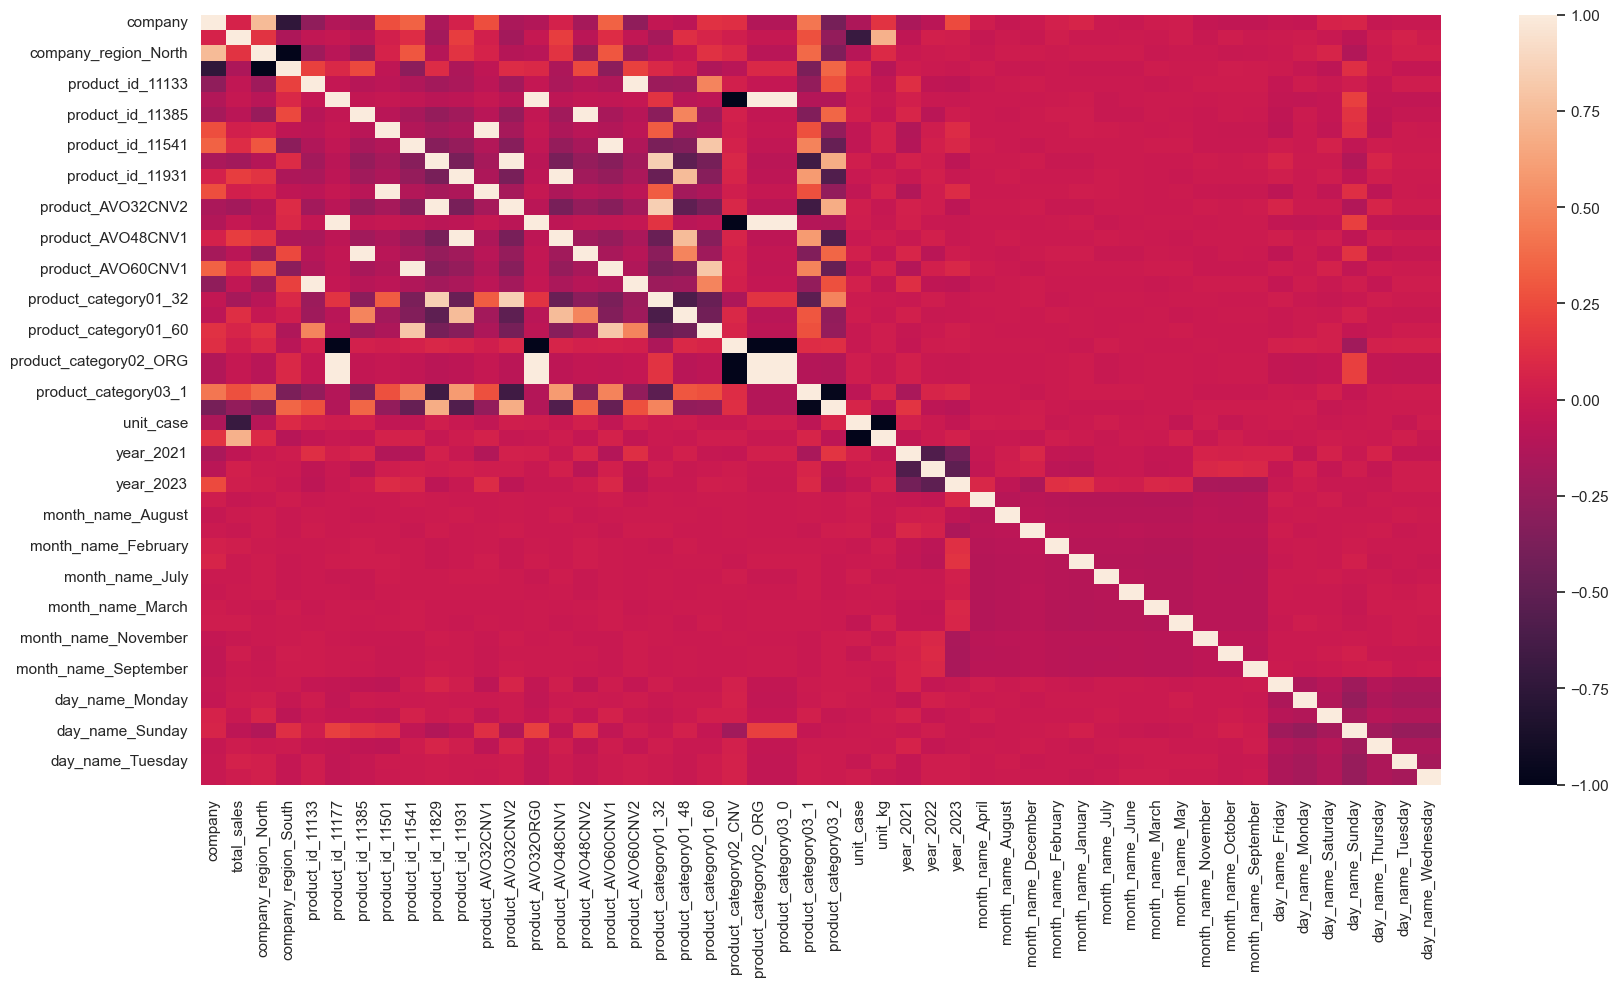

In [268]:
sns.heatmap(df2.corr())

#### *F3.2 Define x and y features :*


In [269]:
y=df2["total_sales"]
x=df2.drop(["total_sales"],axis=1)

---

##### *F3.3 drop any features with coorelation more than 0.5 :*

In [270]:
from feature_engine.selection import DropCorrelatedFeatures
xt= DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.5)

xt = xt.fit_transform(x)
xt


,company,product_id_11133,product_id_11177,product_id_11385,product_id_11501,product_id_11541,product_id_11829,product_id_11931,unit_case,year_2021,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,121,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,131,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,131,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,121,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,121,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11381,121,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
11382,121,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
11383,121,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
11384,131,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


> * *We have reducred the number of features from 52 to 31 ,this means we have dropped 21 feature*

---

#### *F4. Data Scalling :*

In [271]:
# data scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xt_sc=scaler.fit_transform(xt)  
xt_sc=pd.DataFrame(xt_sc,columns=xt.columns)

In [273]:
xt_sc.head()

,company,product_id_11133,product_id_11177,product_id_11385,product_id_11501,product_id_11541,product_id_11829,product_id_11931,unit_case,year_2021,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-0.990519,-0.276823,-0.118498,-0.363458,-0.256909,-0.458433,1.440531,-0.558130,0.148923,1.470286,...,-0.257688,-0.272178,-0.262136,2.93402,-0.425056,-0.293815,-0.59657,-0.340345,-0.417946,-0.417509
1,1.009571,-0.276823,-0.118498,-0.363458,-0.256909,2.181342,-0.694189,-0.558130,0.148923,1.470286,...,-0.257688,-0.272178,-0.262136,2.93402,-0.425056,-0.293815,-0.59657,-0.340345,-0.417946,-0.417509
2,1.009571,-0.276823,-0.118498,-0.363458,-0.256909,-0.458433,-0.694189,1.791696,0.148923,1.470286,...,-0.257688,-0.272178,-0.262136,2.93402,-0.425056,-0.293815,-0.59657,-0.340345,-0.417946,-0.417509
3,-0.990519,-0.276823,-0.118498,-0.363458,-0.256909,-0.458433,1.440531,-0.558130,0.148923,1.470286,...,-0.257688,-0.272178,-0.262136,2.93402,-0.425056,-0.293815,-0.59657,-0.340345,-0.417946,-0.417509
4,-0.990519,-0.276823,-0.118498,2.751348,-0.256909,-0.458433,-0.694189,-0.558130,0.148923,1.470286,...,-0.257688,-0.272178,-0.262136,2.93402,-0.425056,-0.293815,-0.59657,-0.340345,-0.417946,-0.417509


---

#### *F5. Split the data into training and testing sets :*

In [274]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=10)
xtrain.columns

Index(['company', 'company_region_North', 'company_region_South',
       'product_id_11133', 'product_id_11177', 'product_id_11385',
       'product_id_11501', 'product_id_11541', 'product_id_11829',
       'product_id_11931', 'product_AVO32CNV1', 'product_AVO32CNV2',
       'product_AVO32ORG0', 'product_AVO48CNV1', 'product_AVO48CNV2',
       'product_AVO60CNV1', 'product_AVO60CNV2', 'product_category01_32',
       'product_category01_48', 'product_category01_60',
       'product_category02_CNV', 'product_category02_ORG',
       'product_category03_0', 'product_category03_1', 'product_category03_2',
       'unit_case', 'unit_kg', 'year_2021', 'year_2022', 'year_2023',
       'month_name_April', 'month_name_August', 'month_name_December',
       'month_name_February', 'month_name_January', 'month_name_July',
       'month_name_June', 'month_name_March', 'month_name_May',
       'month_name_November', 'month_name_October', 'month_name_September',
       'day_name_Friday', 'day_name_Mond

---

#### *F6. Apply differnt types of algorithms :*

In [275]:
from sklearn.linear_model import  SGDRegressor,LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

> ##### *F6.1 LinearRegression :*

In [276]:
lr=LinearRegression(fit_intercept=True)
lr.fit(xtrain,ytrain)
lrypredict=lr.predict(xtest)
print("lr.score-train data is :", lr.score(xtrain,ytrain))
print("lr.score-test data is :", lr.score(xtest,ytest))
print("r2_score is :", r2_score(ytest,lrypredict))
print("lr.intercept_ :", lr.intercept_)
print("lr._Root_mean_sqr_erroe :", np.sqrt(mean_squared_error(ytest,lrypredict)))

lr.score-train data is : 0.5902763610328257
lr.score-test data is : 0.5777565274599976
r2_score is : 0.5777565274599976
lr.intercept_ : 1233077109031265.2
lr._Root_mean_sqr_erroe : 12701.493210459656


> ##### *F6.2 DecisionTreeRegressor :*

In [277]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(criterion="squared_error",max_depth=10,min_samples_split=10,random_state=0)
DTree.fit(xtrain,ytrain)
DTreeypredict=DTree.predict(xtest)
print("DTree.score-train data is :", DTree.score(xtrain,ytrain))
print("DTree.score-test data is :", DTree.score(xtest,ytest))
print("r2_score is :", r2_score(ytest,DTreeypredict))
print("DTree._Root_mean_sqr_erroe :", np.sqrt(mean_squared_error(ytest,DTreeypredict)));

DTree.score-train data is : 0.9201808529361215
DTree.score-test data is : 0.8297361407780809
r2_score is : 0.8297361407780809
DTree._Root_mean_sqr_erroe : 8065.560340305124


> ##### *F6.3 RandomForestRegressor :*

In [278]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(criterion="squared_error",max_depth=10,min_samples_split=10,random_state=0)
RF.fit(xtrain,ytrain)
RFypredict=RF.predict(xtest)
print("RF.score-train data is :", RF.score(xtrain,ytrain))
print("RF.score-test data is :", RF.score(xtest,ytest))
print("r2_score is :", r2_score(ytest,RFypredict))
print("RF._Root_mean_sqr_erroe :", np.sqrt(mean_squared_error(ytest,RFypredict)));

RF.score-train data is : 0.9079241871786085
RF.score-test data is : 0.8621727703906276
r2_score is : 0.8621727703906276
RF._Root_mean_sqr_erroe : 7256.727607829324


> ##### *F4.4 SVM - SVR :*

In [279]:
from sklearn.svm import SVR
svm_R=SVR()
svm_R.fit(xtrain,ytrain)
svm_Rypredict=svm_R.predict(xtest)
print("svm_R.score-train data is :", svm_R.score(xtrain,ytrain))
print("svm_R.score-test data is :", svm_R.score(xtest,ytest))
print("r2_score is :", r2_score(ytest,svm_Rypredict))
print("svm_R._Root_mean_sqr_erroe :", np.sqrt(mean_squared_error(ytest,svm_Rypredict)));

svm_R.score-train data is : -0.029583545752777107
svm_R.score-test data is : -0.02870814246843123
r2_score is : -0.02870814246843123
svm_R._Root_mean_sqr_erroe : 19825.283062489


> ##### *F5.5 SGDRegressor :*

In [280]:
sgdr=SGDRegressor(fit_intercept=True,loss="squared_error",max_iter=10000,penalty="l2",alpha=0.0001,learning_rate="optimal",random_state=0)
sgdr.fit(xtrain,ytrain)
sgdrypredict=sgdr.predict(xtest)
print("sgdr.score-train data is :", sgdr.score(xtrain,ytrain))
print("sgdr.score-test data is :", sgdr.score(xtest,ytest))
print("r2_score is :", r2_score(ytest,sgdrypredict))
print("sgdr._Root_mean_sqr_erroe :", np.sqrt(mean_squared_error(ytest,sgdrypredict)));

sgdr.score-train data is : -1.006024110058119e+19
sgdr.score-test data is : -1.2880430042218916e+19
r2_score is : -1.2880430042218916e+19
sgdr._Root_mean_sqr_erroe : 70151746824195.44


---

#### *F8. Compare the differnt outcomes to find the best one :*

In [281]:
moduls=["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","svm_R","SGDRegressor"]

score_train_data=[round(lr.score(xtrain,ytrain),2),round(DTree.score(xtrain,ytrain),2),round(RF.score(xtrain,ytrain),2),round(svm_R.score(xtrain,ytrain),2),
                  round(sgdr.score(xtrain,ytrain),2)]

score_test_data=[round(lr.score(xtest,ytest),2),round(DTree.score(xtest,ytest),2),round(RF.score(xtest,ytest),2),round(svm_R.score(xtest,ytest),2),
                 round(sgdr.score(xtest,ytest),2)]

r_squered_score=[round(r2_score(ytest,lrypredict),2),round(r2_score(ytest,DTreeypredict),2),round(r2_score(ytest,RFypredict),2),round(r2_score(ytest,svm_Rypredict),2),
                 round(r2_score(ytest,sgdrypredict),2)]

rmse=[np.sqrt(mean_squared_error(ytest,lrypredict)),np.sqrt(mean_squared_error(ytest,DTreeypredict)),np.sqrt(mean_squared_error(ytest,RFypredict)),
      np.sqrt(mean_squared_error(ytest,svm_Rypredict)),np.sqrt(mean_squared_error(ytest,sgdrypredict))]



In [282]:
compared_outcome={"moduls":moduls,
   "score_train_data":score_train_data,
   "score_test_data":score_test_data,
   "r_squered_score":r_squered_score,
   "rmse":rmse}
compared_outcome=pd.DataFrame(compared_outcome)
compared_outcome["mse"]=compared_outcome["rmse"]**2
compared_outcome.sort_values(by="mse",ascending=True)

,moduls,score_train_data,score_test_data,r_squered_score,rmse,mse
2,RandomForestRegressor,9.100000e-01,8.600000e-01,8.600000e-01,7.256728e+03,5.266010e+07
1,DecisionTreeRegressor,9.200000e-01,8.300000e-01,8.300000e-01,8.065560e+03,6.505326e+07
0,LinearRegression,5.900000e-01,5.800000e-01,5.800000e-01,1.270149e+04,1.613279e+08
3,svm_R,-3.000000e-02,-3.000000e-02,-3.000000e-02,1.982528e+04,3.930418e+08
4,SGDRegressor,-1.006024e+19,-1.288043e+19,-1.288043e+19,7.015175e+13,4.921268e+27


> We can see above that:
> - RandomForestRegressor has the lowest mse 

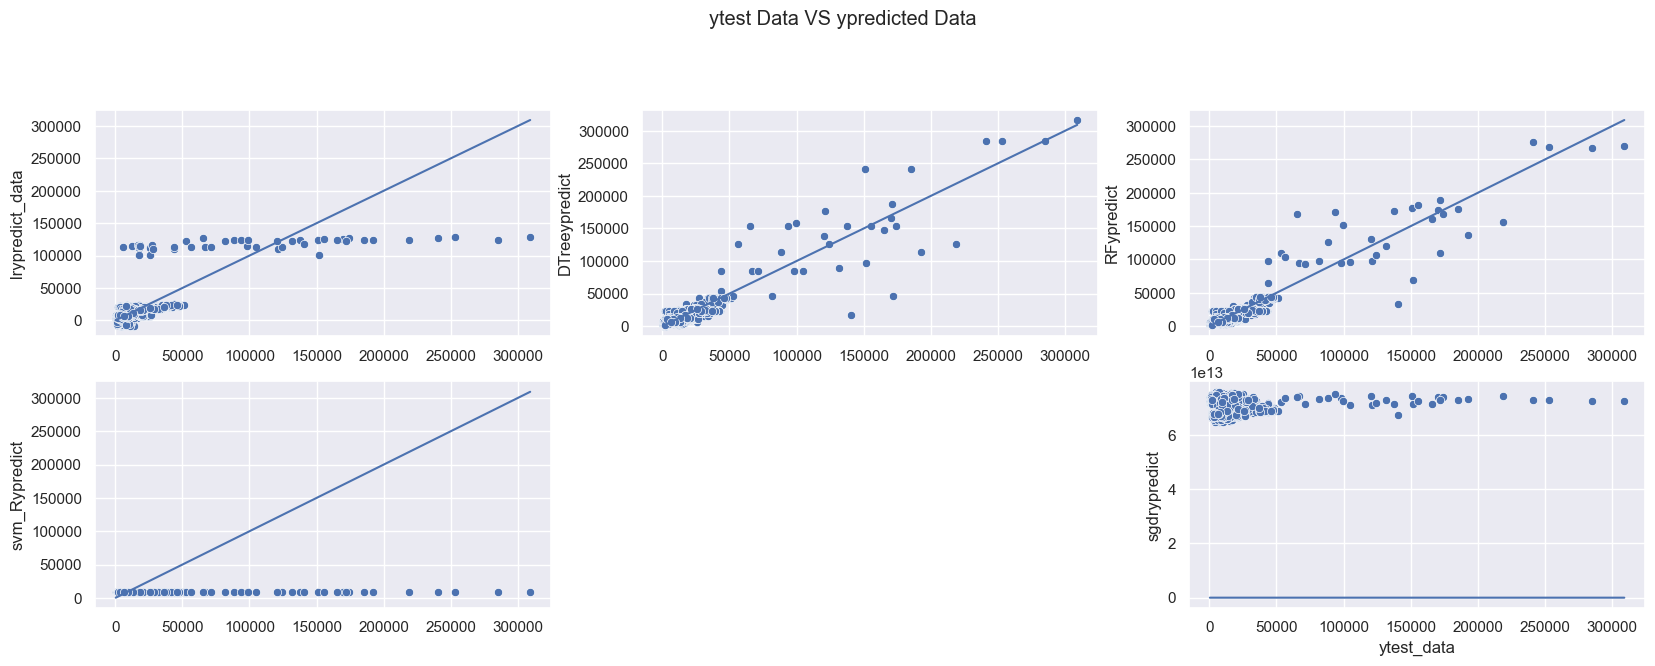

In [283]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("ytest Data VS ypredicted Data ")


plt.subplot(331)
sns.scatterplot(x=ytest,y=lrypredict)
sns.lineplot(x=ytest,y=ytest)
plt.xlabel("")
plt.ylabel("lrypredict_data");

plt.subplot(332)
sns.scatterplot(x=ytest,y=DTreeypredict)
sns.lineplot(x=ytest,y=ytest)
plt.xlabel("")
plt.ylabel("DTreeypredict");

plt.subplot(333)
sns.scatterplot(x=ytest,y=RFypredict)
sns.lineplot(x=ytest,y=ytest)
plt.xlabel("")
plt.ylabel("RFypredict");

plt.subplot(334)
sns.scatterplot(x=ytest,y=svm_Rypredict)
sns.lineplot(x=ytest,y=ytest)
plt.xlabel("")
plt.ylabel("svm_Rypredict");

plt.subplot(336)
sns.scatterplot(x=ytest,y=sgdrypredict)
sns.lineplot(x=ytest,y=ytest)
plt.xlabel("ytest_data")
plt.ylabel("sgdrypredict");


In [284]:
outcome={"features":RF.feature_names_in_,"importance":RF.feature_importances_}
outcome=pd.DataFrame(outcome).sort_values(ascending=False,by="importance")
outcome

,features,importance
25,unit_case,2.723737e-01
26,unit_kg,2.652466e-01
23,product_category03_1,7.561852e-02
24,product_category03_2,6.826973e-02
1,company_region_North,6.433980e-02
2,company_region_South,5.595572e-02
0,company,4.054189e-02
29,year_2023,2.661902e-02
45,day_name_Sunday,1.741833e-02
28,year_2022,1.593580e-02
